In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# read csv file
# The Data source is from "!kaggle datasets download -d mkechinov/ecommerce-purchase-history-from-jewelry-store"

columns = ["order_date", "order_id", "product_id", "quantity", "category_id", "category_code", 
           "brand", "price", "user_id", "gender", "color", "metal", "gem"]

df = pd.read_csv("./Resources/jewelry.csv", header=None, names=columns, skiprows=1)
df.head()


,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst


In [3]:
df.dtypes

order_date        object
order_id           int64
product_id         int64
quantity           int64
category_id      float64
category_code     object
brand            float64
price            float64
user_id          float64
gender            object
color             object
metal             object
gem               object
dtype: object

In [4]:
df.shape

(95911, 13)

In [5]:
# datatype category can be faster load than object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_date     95911 non-null  object 
 1   order_id       95911 non-null  int64  
 2   product_id     95911 non-null  int64  
 3   quantity       95911 non-null  int64  
 4   category_id    90559 non-null  float64
 5   category_code  85978 non-null  object 
 6   brand          91126 non-null  float64
 7   price          90559 non-null  float64
 8   user_id        90559 non-null  float64
 9   gender         47743 non-null  object 
 10  color          88251 non-null  object 
 11  metal          90449 non-null  object 
 12  gem            61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [6]:
df.describe()

,order_id,product_id,quantity,category_id,brand,price,user_id
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [7]:
# This will show the summary of dataset with category 
df.describe(exclude="number")

,order_date,category_code,gender,color,metal,gem
count,95911,85978,47743,88251,90449,61853
unique,74505,218,2,5,3,30
top,2020-10-17 12:58:28 UTC,jewelry.earring,f,red,gold,diamond
freq,26,29052,47379,69511,89082,29610


In [8]:
# This will show the summary of dataset with number only
df.describe(include='number')

,order_id,product_id,quantity,category_id,brand,price,user_id
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [9]:
# Help screen
# "Shift + Tab" will show the explanation of the function or
# "df.info?" will show the explanation
df.info?

In [10]:
# df is not available True = 1, False = 0
# this shows the sum of null values in each variable
# CustomerID? Why does User_id have null value?
df.isnull().sum()

order_date           0
order_id             0
product_id           0
quantity             0
category_id       5352
category_code     9933
brand             4785
price             5352
user_id           5352
gender           48168
color             7660
metal             5462
gem              34058
dtype: int64

In [11]:
# this shows 7.92% of user_id has no user_id, which could mean they did guest checkout
df.isnull().mean() * 100

order_date        0.000000
order_id          0.000000
product_id        0.000000
quantity          0.000000
category_id       5.580173
category_code    10.356476
brand             4.989000
price             5.580173
user_id           5.580173
gender           50.221560
color             7.986571
metal             5.694863
gem              35.510004
dtype: float64

In [12]:
df.describe()

,order_id,product_id,quantity,category_id,brand,price,user_id
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


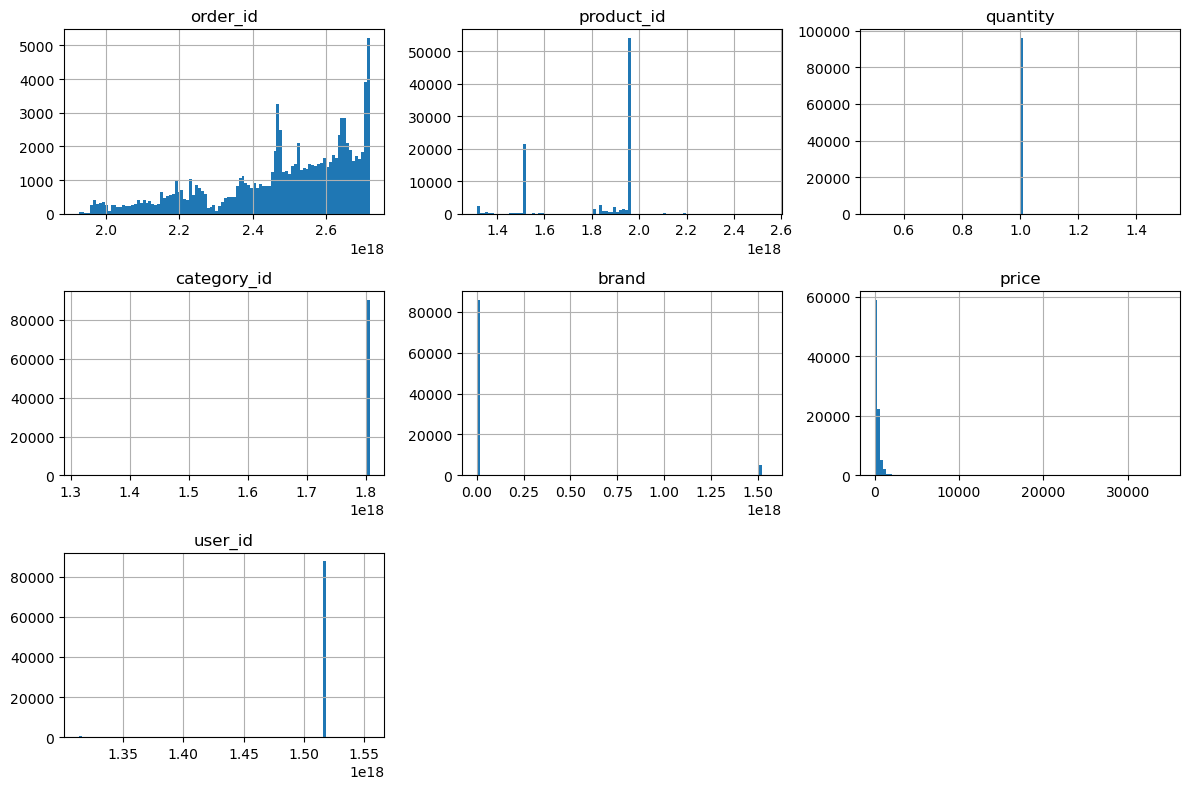

In [13]:
df.hist(figsize=(12, 8), bins=100)
plt.tight_layout()  # fixes spacing and ensures plots are complete
plt.savefig("./Images/df_summary_hist.png")

In [14]:
# convert 'order date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Convert directly if already timezone-aware
df['order_date'] = df['order_date'].dt.tz_convert('America/New_York')

In [15]:
# Analysis on the frequency of registered_customer or guest_checkout
# df["user_id"].isnull().value_counts(1) = df["user_id"].isnull().value_counts(normalize=True) 
df["user_id"].isnull().value_counts(normalize=True)

user_id
False    0.944198
True     0.055802
Name: proportion, dtype: float64

In [16]:
# Calculate the TotalRevenue by multiplying price and quantity
df["TotalRevenue"] = df["quantity"] * df["price"]

In [17]:
# Check whether any records with missing 'user_id' have a positive 'revenue'
check = df[df["user_id"].isnull()]
check[check["TotalRevenue"]>0]

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue


In [18]:
# List the value_counts of column "Gem" has "user_id"
df.loc[df["user_id"].notnull(), "gem"].value_counts()

gem
diamond                29610
fianit                 12051
topaz                   6318
pearl                   3632
garnet                  2704
sapphire                1866
amethyst                1632
mix                     1479
emerald                  833
quartz                   540
amber                    228
spinel                   156
ruby                     151
quartz_smoky              93
nanocrystal               88
nacre                     78
chrysolite                74
citrine                   51
tourmaline                50
sitall                    44
corundum_synthetic        41
coral                     41
agate                     24
turquoise                 22
rhodolite                 18
emerald_geothermal         9
chrysoprase                6
onyx                       6
garnet_synthetic           6
sapphire_geothermal        2
Name: count, dtype: int64

In [19]:
# Check if there are any rows with null values in the 'user_id' column
df.loc[~df["user_id"].notnull(), "order_id"].value_counts()

order_id
2581200805159764328    7
2374994954771497969    6
2634826374728123386    5
2627049304103060399    4
2709395093537685507    4
                      ..
2648053981057647167    1
2648055452360770152    1
2648058286921745063    1
2648061997261783813    1
2719016587653808559    1
Name: count, Length: 4826, dtype: int64

In [20]:
# Double check whether the rows with null values in user_id have revenue or not
missing_user_orders = df.loc[df["user_id"].isnull(), "order_id"]
df[df["order_id"].isin(missing_user_orders)]

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue
445,2019-01-26 00:51:21-05:00,1965130913738130034,1956663836819849607,1,1.806829e+18,jewelry.ring,0.000000e+00,280.68,1.550613e+18,f,white,gold,sapphire,280.68
446,2019-01-26 00:51:21-05:00,1965130913738130034,1937825427510789079,1,NaN,230.12,1.550613e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,2019-02-05 03:39:25-05:00,1972463258694582403,1536903766496772737,1,NaN,202.36,1.325156e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2019-02-14 05:54:07-05:00,1979054038959784609,1515966222721436570,1,NaN,1098.03,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2019-02-14 05:54:07-05:00,1979054038959784609,1463130437630034093,1,NaN,321.78,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95891,2021-12-01 03:58:49-05:00,2718992028972089719,1515966223638498936,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,2021-12-01 04:05:55-05:00,2718995597712425499,1515966223677246857,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95894,2021-12-01 04:14:01-05:00,2718999678082351855,1536902230743974482,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95902,2021-12-01 04:33:22-05:00,2719009418078322840,1465165964994675113,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df[df["user_id"].isnull()]

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue
446,2019-01-26 00:51:21-05:00,1965130913738130034,1937825427510789079,1,NaN,230.12,1.550613e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,2019-02-05 03:39:25-05:00,1972463258694582403,1536903766496772737,1,NaN,202.36,1.325156e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,2019-02-14 05:54:07-05:00,1979054038959784609,1515966222721436570,1,NaN,1098.03,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,2019-02-14 05:54:07-05:00,1979054038959784609,1463130437630034093,1,NaN,321.78,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,2019-02-14 05:55:34-05:00,1979054768877732525,1515966222725319293,1,NaN,1128.62,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95891,2021-12-01 03:58:49-05:00,2718992028972089719,1515966223638498936,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,2021-12-01 04:05:55-05:00,2718995597712425499,1515966223677246857,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95894,2021-12-01 04:14:01-05:00,2718999678082351855,1536902230743974482,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95902,2021-12-01 04:33:22-05:00,2719009418078322840,1465165964994675113,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.dropna(subset=["user_id"])

In [23]:
df["user_id"].isnull().sum()  # should return 0

0

In [24]:
df["user_id"].isnull().value_counts(normalize=True)

user_id
False    1.0
Name: proportion, dtype: float64

In [25]:
df.shape

(90559, 14)

### ARPU (Average Revenue Per User)

Measures the average revenue generated per user in a given time period.
ARPU = Revenue / The number of Unique Customer

### ARPPU (Average Revenue Per Paying User) 
measures the average revenue generated by each paying customer over a specific period

In [26]:
ARPU = df.groupby("user_id").agg({
    "TotalRevenue":"sum"
})
ARPU.sort_values('TotalRevenue', ascending=False)

,TotalRevenue
user_id,
1.515916e+18,458708.74
1.515916e+18,284892.01
1.515916e+18,270577.74
1.515916e+18,258134.87
1.515916e+18,254817.45
...,...
1.491835e+18,6.47
1.515916e+18,5.00
1.515916e+18,3.84


In [27]:
# Calculate the first order date ['FirstOrderDate']
df['FirstOrderDate'] = df.groupby(['user_id'])['order_date'].transform("min")

# Extract Year and Month from the FirstOrderDate column 'FirstOrderYM' 
df['FirstOrderYM'] = df['FirstOrderDate'].astype(str).str[:7]

# Extract Year and Month and create column "OrderYM"

df["OrderYM"] = df['order_date'].astype(str).str[:7]

# Show 5 random rows of the df
df.sample(5)

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue,FirstOrderDate,FirstOrderYM,OrderYM
83248,2021-10-18 02:00:39-04:00,2687012222638489868,1956663847750205959,1,1.806829e+18,jewelry.earring,0.0,166.99,1.515916e+18,NaN,red,gold,fianit,166.99,2021-10-17 14:05:40-04:00,2021-10,2021-10
77123,2021-09-10 11:01:07-04:00,2659742771002213186,1515966223589575049,1,1.806829e+18,jewelry.earring,1.0,1335.48,1.515916e+18,f,red,gold,diamond,1335.48,2021-07-29 05:52:04-04:00,2021-07,2021-09
64738,2021-07-12 12:15:17-04:00,2616293551436202235,1343446704099164925,1,1.806829e+18,jewelry.pendant,1.0,410.82,1.515916e+18,f,red,gold,diamond,410.82,2020-06-04 03:14:57-04:00,2020-06,2021-07
44976,2021-02-17 09:08:37-05:00,2511137322628546596,2135321650495750282,1,1.806829e+18,jewelry.earring,1.0,223.15,1.515916e+18,f,red,gold,fianit,223.15,2021-02-17 09:08:37-05:00,2021-02,2021-02
3334,2019-05-25 08:41:46-04:00,2051585795642359999,1956663847725040099,1,1.806829e+18,jewelry.ring,0.0,200.45,1.515916e+18,NaN,NaN,gold,NaN,200.45,2019-01-26 05:04:35-05:00,2019-01,2019-05


In [28]:
# Get ARPPU
arppu = df.groupby(["OrderYM"]).agg({
    "TotalRevenue":"sum",
    "user_id": "nunique"
})

arppu["ARPPU"] = arppu["TotalRevenue"] / arppu["user_id"]
arppu.head()

,TotalRevenue,user_id,ARPPU
OrderYM,,,
2018-12,33935.77,66,514.178333
2019-01,191471.91,207,924.985072
2019-02,240664.70,282,853.420922
2019-03,216511.73,283,765.059117
2019-04,229081.68,241,950.546390


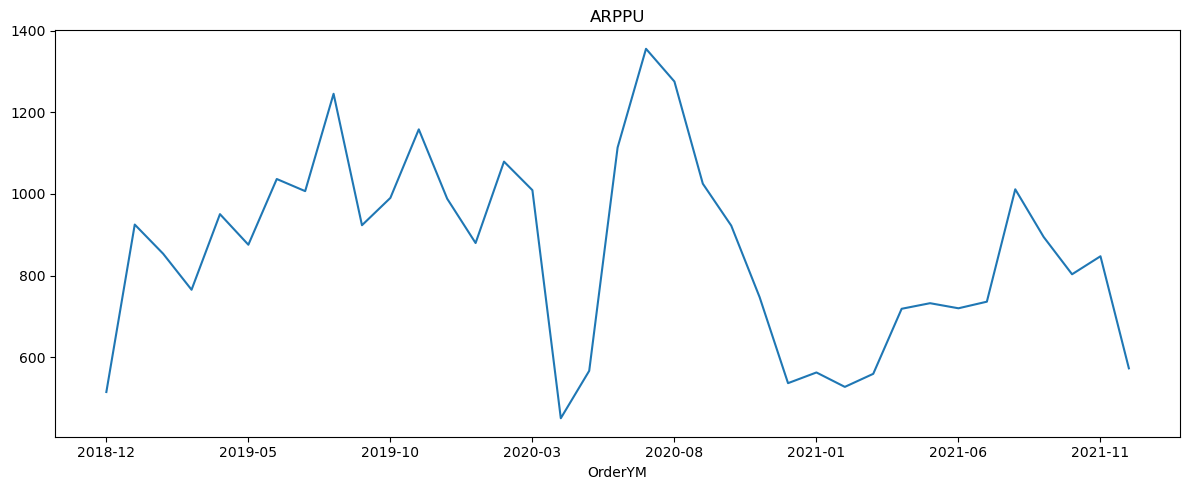

In [29]:
arppu["ARPPU"].plot(figsize=(12,5), title="ARPPU")
plt.tight_layout()  # fixes spacing and ensures plots are complete
plt.savefig("./Images/ARPPU.png")

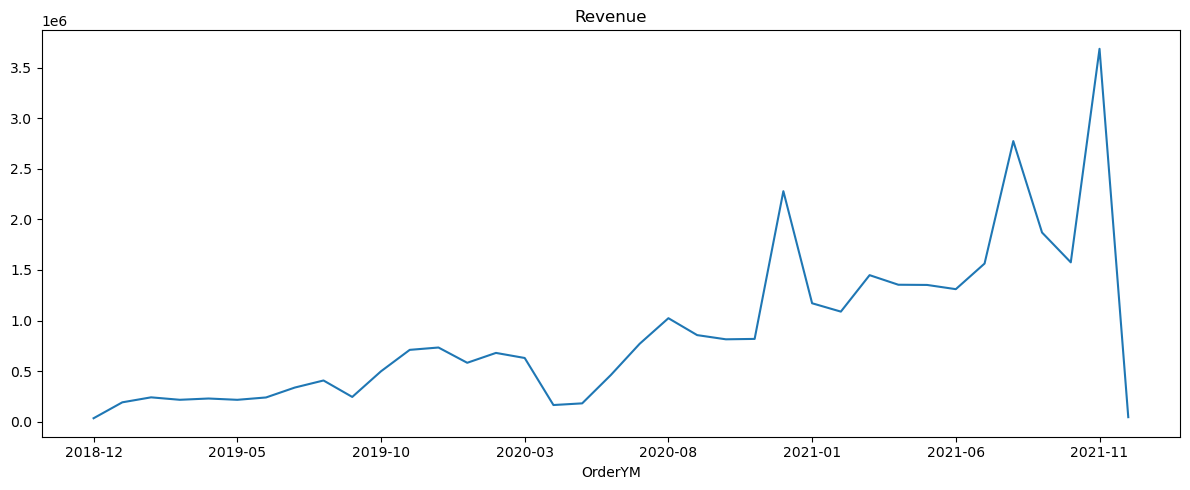

In [30]:
arppu["TotalRevenue"].plot(figsize=(12,5), title="Revenue")
plt.tight_layout()  # fixes spacing and ensures plots are complete
plt.savefig("./Images/Revenue.png")

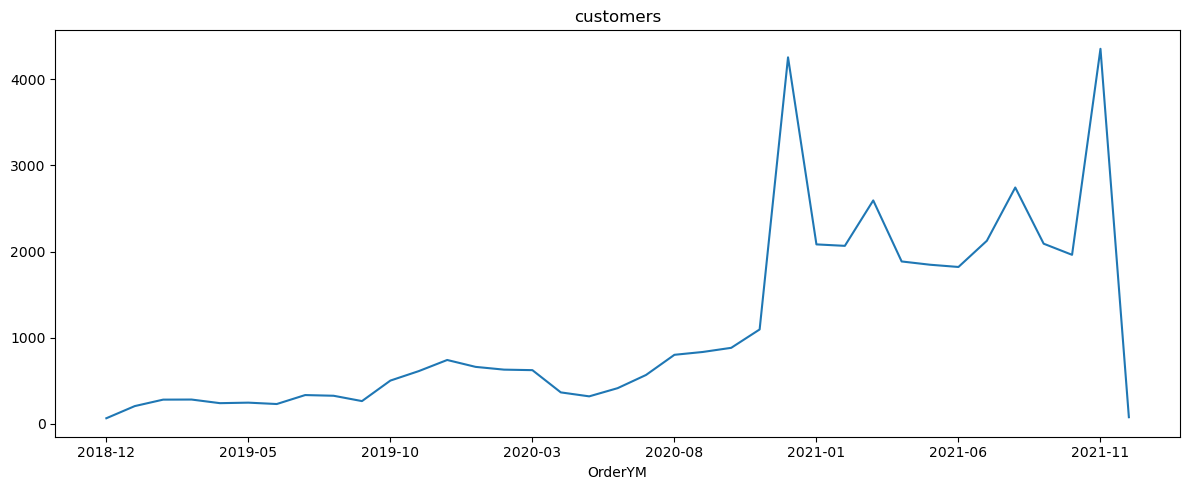

In [31]:
arppu["user_id"].plot(figsize=(12,5), title="customers")
plt.tight_layout()  # fixes spacing and ensures plots are complete
plt.savefig("./Images/customers.png")

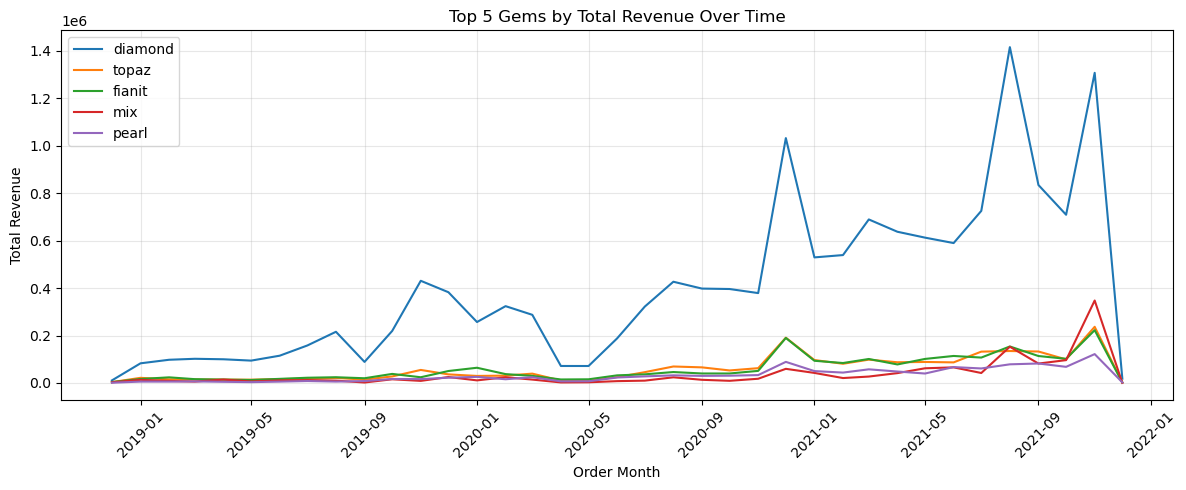

In [32]:
# Get top 5 gems by total revenue
top5_gems = (
    df.groupby("gem")["TotalRevenue"]
    .sum()
    .nlargest(5)
    .index
)

# Filter to only those gems
df_top5_g = df[df["gem"].isin(top5_gems)]

# Group by gem and OrderYM, and sum TotalRevenue
monthly_revenue_g = (
    df_top5_g.groupby(["gem", "OrderYM"])["TotalRevenue"]
    .sum()
    .reset_index()
)

# Convert OrderYM to datetime for proper plotting
monthly_revenue_g["OrderYM"] = pd.to_datetime(monthly_revenue_g["OrderYM"])

# Plot each gem's monthly revenue trend
plt.figure(figsize=(12, 5))

for gem in top5_gems:
    gem_data = monthly_revenue_g[monthly_revenue_g["gem"] == gem].sort_values("OrderYM")
    plt.plot(gem_data["OrderYM"], gem_data["TotalRevenue"], label=gem)

# Plot formatting
plt.xlabel("Order Month")
plt.ylabel("Total Revenue")
plt.title("Top 5 Gems by Total Revenue Over Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show
plt.savefig("./Images/Top_5_gem.png", dpi=100, bbox_inches='tight')
plt.show()

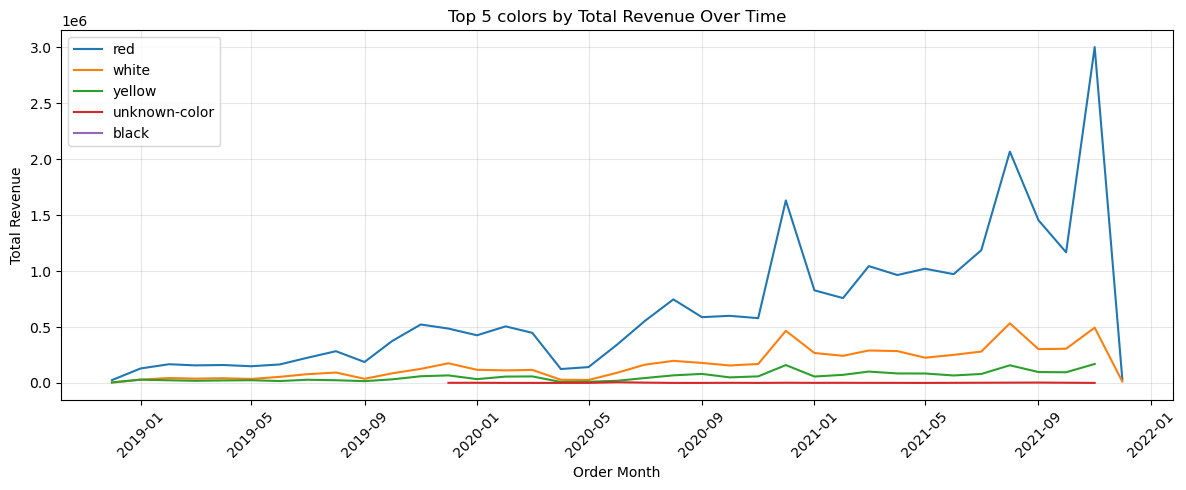

In [33]:
# Get top 5 colors by total revenue
top5_colors = (
    df.groupby("color")["TotalRevenue"]
    .sum()
    .nlargest(5)
    .index
)

# Filter to only those gems
df_top5_c = df[df["color"].isin(top5_colors)]

# Group by gem and OrderYM, and sum TotalRevenue
monthly_revenue_c = (
    df_top5_c.groupby(["color", "OrderYM"])["TotalRevenue"]
    .sum()
    .reset_index()
)

# Convert OrderYM to datetime for proper plotting
monthly_revenue_c["OrderYM"] = pd.to_datetime(monthly_revenue_c["OrderYM"])

# Plot each gem's monthly revenue trend
plt.figure(figsize=(12, 5))

for color in top5_colors:
    color_data = monthly_revenue_c[monthly_revenue_c["color"] == color].sort_values("OrderYM")
    plt.plot(color_data["OrderYM"], color_data["TotalRevenue"], label=color)

# Plot formatting
plt.xlabel("Order Month")
plt.ylabel("Total Revenue")
plt.title("Top 5 colors by Total Revenue Over Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show
plt.savefig("./Images/Top_5_color.png", dpi=100, bbox_inches='tight')
plt.show()

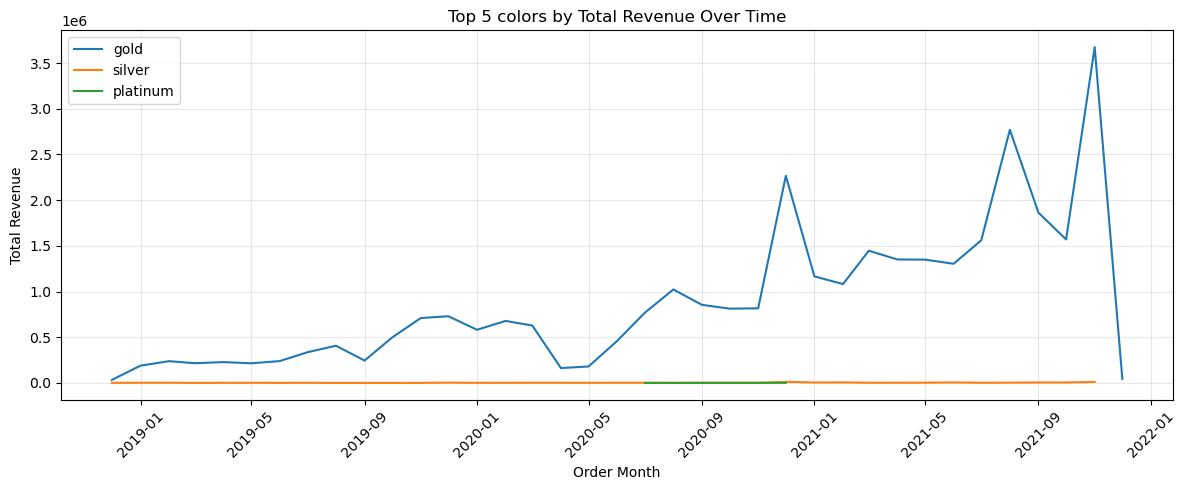

In [34]:
# Get top 5 colors by total revenue
top5_metals = (
    df.groupby("metal")["TotalRevenue"]
    .sum()
    .nlargest(5)
    .index
)

# Filter to only those gems
df_top5_m = df[df["metal"].isin(top5_metals)]

# Group by gem and OrderYM, and sum TotalRevenue
monthly_revenue_m = (
    df_top5_m.groupby(["metal", "OrderYM"])["TotalRevenue"]
    .sum()
    .reset_index()
)

# Convert OrderYM to datetime for proper plotting
monthly_revenue_m["OrderYM"] = pd.to_datetime(monthly_revenue_m["OrderYM"])

# Plot each gem's monthly revenue trend
plt.figure(figsize=(12, 5))

for metal in top5_metals:
    metal_data = monthly_revenue_m[monthly_revenue_m["metal"] == metal].sort_values("OrderYM")
    plt.plot(metal_data["OrderYM"], metal_data["TotalRevenue"], label=metal)

# Plot formatting
plt.xlabel("Order Month")
plt.ylabel("Total Revenue")
plt.title("Top 5 colors by Total Revenue Over Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show
plt.savefig("./Images/Top_5_metal.png", dpi=100, bbox_inches='tight')
plt.show()

In [35]:
# customer order frequency
cust_agg = df.groupby(["user_id"]).agg({
    "order_id":"count",
    "TotalRevenue":["mean","sum"]
}).sort_values(("order_id", "count"), ascending=False)

cust_agg.head(10)

order_id TotalRevenue           
                count         mean        sum
user_id                                      
1.515916e+18     1068   429.502566  458708.74
1.515916e+18      696   388.761121  270577.74
1.515916e+18      540   527.577796  284892.01
1.515916e+18      509   500.623674  254817.45
1.515916e+18      480   537.780979  258134.87
1.515916e+18      471   362.623928  170795.87
1.515916e+18      425   433.706471  184325.25
1.515916e+18      408   412.450245  168279.70
1.515916e+18      402   430.407587  173023.85
1.515916e+18      372   343.905565  127932.87

In [36]:
cust_agg.shape

(31079, 3)

In [37]:
x = round(31079/5)
x

6216

In [38]:
cust_agg.dtypes

order_id      count      int64
TotalRevenue  mean     float64
              sum      float64
dtype: object

In [39]:
cust_agg = df.groupby("user_id").agg({
    "order_id": "count",
    "TotalRevenue": ["mean", "sum"]
})

# Flatten column names
cust_agg.columns = ["_".join(col) for col in cust_agg.columns]

# Now this will work
top_20_perc_cust_rev = cust_agg["TotalRevenue_sum"].nlargest(x).sum()

top_20_perc_cust_rev

25168076.96

In [40]:
top_20_perc_cust_rev_percent = top_20_cust_rev / cust_agg["TotalRevenue_sum"].sum()
top_20_perc_cust_rev_percent

NameError: name 'top_20_cust_rev' is not defined

In [41]:
cust_agg.describe()

,order_id_count,TotalRevenue_mean,TotalRevenue_sum
count,31079.000000,31079.000000,31079.000000
mean,2.913832,316.038405,1055.434470
std,14.510317,354.212469,6455.688487
min,1.000000,1.030000,1.030000
25%,1.000000,136.850000,165.620000
50%,1.000000,232.740000,335.480000
75%,2.000000,378.670000,698.360000
max,1068.000000,15599.180000,458708.740000


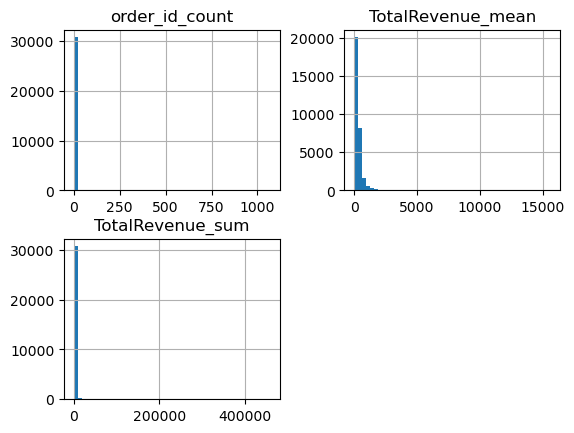

In [42]:
cust_agg.hist(bins=50);

### Cohort Analysis
A cohort is a group of people sharing common characteristics over a specified period. cohort table visualization is useful, for example, when you want to learn how a cohort engages with a brand. you can easily spot changes in trends, then respond accordingly.

* What's the months from the first month of the purchase?

In [43]:
# Get the most recent order date (This can be vary depending on what time range analyst wants to see)
# In this analysis, I am going to extract the last 12 months order history and implement data processing
MostRecentOrder = df['order_date'].max()

# Setting up the start_date within an year from the MostRecentOrder

start_date = MostRecentOrder - pd.DateOffset(months=12)

# Filtered out data older than 12 months and assign df with filtered one

df = df[df['order_date'] > start_date]

df.head(3)

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue,FirstOrderDate,FirstOrderYM,OrderYM
31994,2020-12-01 05:16:47-05:00,2454488130619703495,1839888168183137191,1,1.806829e+18,jewelry.pendant,NaN,116.33,1.515916e+18,NaN,white,gold,diamond,116.33,2020-12-01 03:59:22-05:00,2020-12,2020-12
31995,2020-12-01 05:35:40-05:00,2454497633394229610,1515966223023793081,1,1.806829e+18,jewelry.ring,0.0,403.97,1.515916e+18,NaN,white,gold,diamond,403.97,2020-12-01 03:52:07-05:00,2020-12,2020-12
31996,2020-12-01 05:43:11-05:00,2454501412093034926,1806829194307436609,1,1.806829e+18,jewelry.bracelet,0.0,970.64,1.515916e+18,NaN,red,gold,NaN,970.64,2019-07-21 08:51:03-04:00,2019-07,2020-12


In [44]:
# Reset the "FirstOrderDate" , "FirstOrderYM", and "OrderYM" with filtered df

# Calculate the first order date ['FirstOrderDate']
df['FirstOrderDate'] = df.groupby(['user_id'])['order_date'].transform("min")

# Extract Year and Month from the FirstOrderDate column 'FirstOrderYM' 
df['FirstOrderYM'] = df['FirstOrderDate'].astype(str).str[:7]

# Extract Year and Month and create column "OrderYM"

df["OrderYM"] = df['order_date'].astype(str).str[:7]

# Show 5 random rows of the df
df.sample(5)

,order_date,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem,TotalRevenue,FirstOrderDate,FirstOrderYM,OrderYM
47238,2021-03-04 21:40:16-05:00,2522387275682153094,1956663836232647278,1,1.806829e+18,jewelry.pendant,0.0,68.36,1.515916e+18,f,white,gold,topaz,68.36,2021-03-04 21:40:16-05:00,2021-03,2021-03
72692,2021-08-23 03:03:21-04:00,2646456334425260255,1956663836375253806,1,1.806829e+18,jewelry.pendant,2.0,58.77,1.515916e+18,NaN,red,gold,NaN,58.77,2021-08-23 03:03:21-04:00,2021-08,2021-08
64297,2021-07-09 08:09:23-04:00,2613995457763869080,1956663836090040822,1,1.806829e+18,jewelry.pendant,4.0,8.90,1.515916e+18,f,NaN,silver,fianit,8.90,2020-12-30 04:31:44-05:00,2020-12,2021-07
66416,2021-07-23 05:34:29-04:00,2624064355569763070,1956663846408028982,1,1.806829e+18,jewelry.earring,0.0,554.66,1.515916e+18,NaN,red,gold,sapphire,554.66,2021-06-20 07:54:38-04:00,2021-06,2021-07
73211,2021-08-24 17:03:10-04:00,2647603808464536536,1956663847339164606,1,1.806829e+18,jewelry.bracelet,0.0,319.01,1.515916e+18,NaN,red,gold,NaN,319.01,2021-08-24 13:19:00-04:00,2021-08,2021-08


In [45]:
# Get year difference (year_diff) and month difference (month_diff)

# year_diff
year_diff = df['order_date'].dt.year - df['FirstOrderDate'].dt.year
# month_diff
month_diff = df['order_date'].dt.month - df['FirstOrderDate'].dt.month

In [46]:
# Create ["CohortIndex"] variable with "year_diff * 12 month + month_diff + 1" to calculate the number of month after the first purchase
# 
df["CohortIndex"] = (year_diff * 12) + month_diff + 1
df["CohortIndex"]

31994    1
31995    1
31996    1
31997    1
31998    1
        ..
95905    1
95907    1
95908    1
95909    1
95910    2
Name: CohortIndex, Length: 58854, dtype: int32

In [47]:
# View the columns w/ the first Order date
df[['user_id','order_date','FirstOrderDate']].sample(5)

,user_id,order_date,FirstOrderDate
57004,1.515916e+18,2021-05-17 08:32:09-04:00,2021-05-17 08:32:09-04:00
55275,1.515916e+18,2021-05-04 11:27:03-04:00,2021-05-04 11:27:03-04:00
35869,1.515916e+18,2020-12-21 11:01:00-05:00,2020-12-21 11:01:00-05:00
51769,1.515916e+18,2021-04-07 03:25:36-04:00,2021-04-07 03:25:36-04:00
92025,1.515916e+18,2021-11-23 15:38:46-05:00,2021-11-23 15:38:46-05:00


### Frequency of monthly retained purchases

In [48]:
# calculate the frequency of monthly retained purchases using the CohortIndex value
# calculate the monthly purchase frequency after membership registration using value_counts()
df["CohortIndex"].value_counts()

CohortIndex
1     41360
2      3788
3      2644
4      2352
5      1851
6      1769
7      1469
8      1232
9      1179
10      556
11      354
12      299
13        1
Name: count, dtype: int64

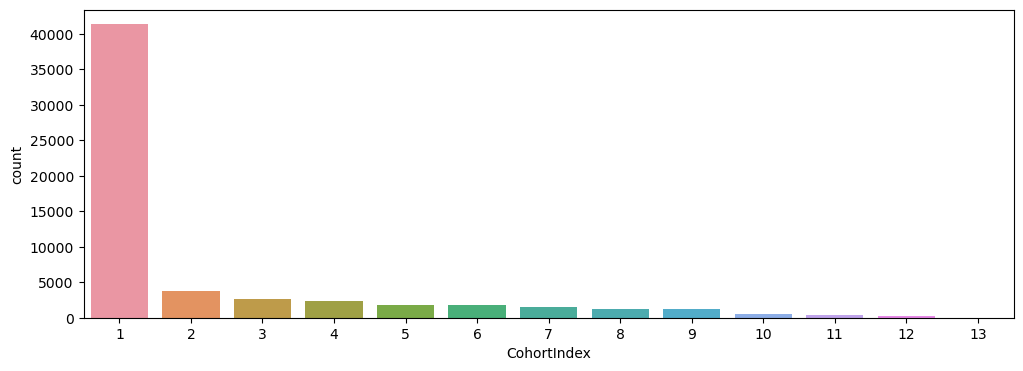

In [49]:
# visualize the frequency of CohortIndex with countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x="CohortIndex")
plt.savefig("./Images/cohort_index.png", dpi=100, bbox_inches='tight')

### Calculating retention frequency

In [50]:
# Group by first_order_date and CohortIndex to calculate the frequency of unique CustomerID value
# Cohort_Count

cohort_count = df.groupby(["FirstOrderYM","CohortIndex"])["user_id"].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstOrderYM,,,,,,,,,,,,,
2020-12,4241.0,221.0,154.0,146.0,120.0,98.0,99.0,107.0,90.0,67.0,59.0,72.0,1.0
2021-01,1862.0,65.0,50.0,41.0,27.0,20.0,23.0,25.0,20.0,18.0,23.0,NaN,NaN
2021-02,1847.0,86.0,42.0,31.0,28.0,31.0,21.0,18.0,25.0,21.0,NaN,NaN,NaN
2021-03,2311.0,116.0,76.0,72.0,80.0,74.0,68.0,60.0,55.0,1.0,NaN,NaN,NaN
2021-04,1566.0,97.0,55.0,73.0,49.0,40.0,27.0,35.0,1.0,NaN,NaN,NaN,NaN
2021-05,1518.0,77.0,46.0,48.0,39.0,22.0,32.0,1.0,NaN,NaN,NaN,NaN,NaN
2021-06,1470.0,81.0,48.0,43.0,36.0,40.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,1684.0,92.0,59.0,35.0,36.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,2296.0,135.0,81.0,85.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# print the color maps
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

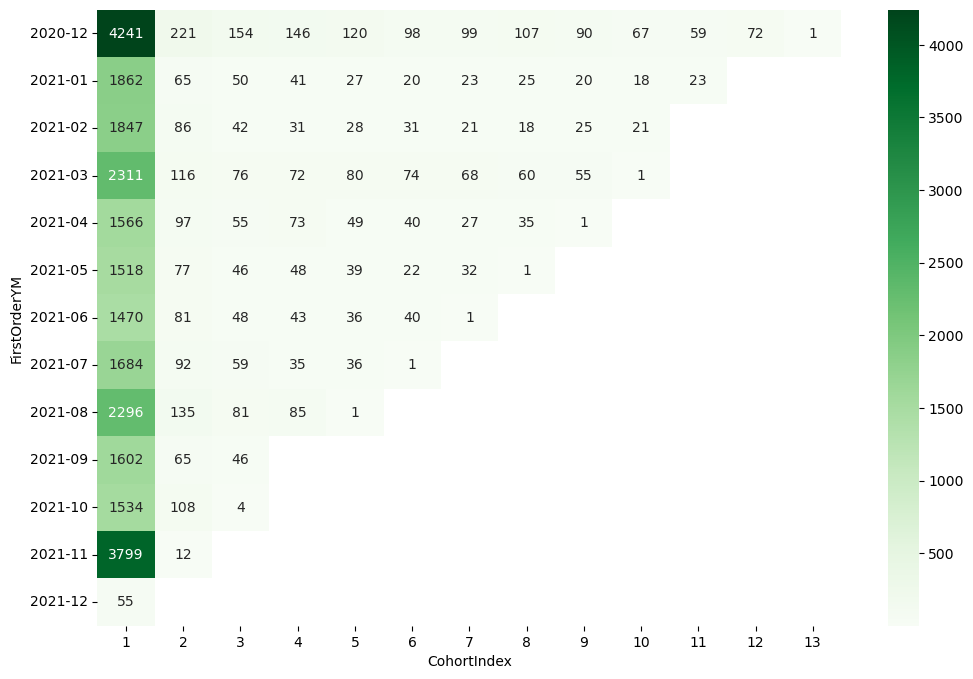

In [52]:
# Visualize the calculated retention numbers using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cohort_count, cmap="Greens", annot=True, fmt=".0f")
plt.savefig("./Images/users_cohort.png", dpi=100, bbox_inches='tight')

### Monthly New Acquisitions

In [53]:
# cohort_count[1]
cohort_count[1]

FirstOrderYM
2020-12    4241.0
2021-01    1862.0
2021-02    1847.0
2021-03    2311.0
2021-04    1566.0
2021-05    1518.0
2021-06    1470.0
2021-07    1684.0
2021-08    2296.0
2021-09    1602.0
2021-10    1534.0
2021-11    3799.0
2021-12      55.0
Name: 1, dtype: float64

<Axes: title={'center': 'Monthly Acquisition'}, xlabel='FirstOrderYM'>

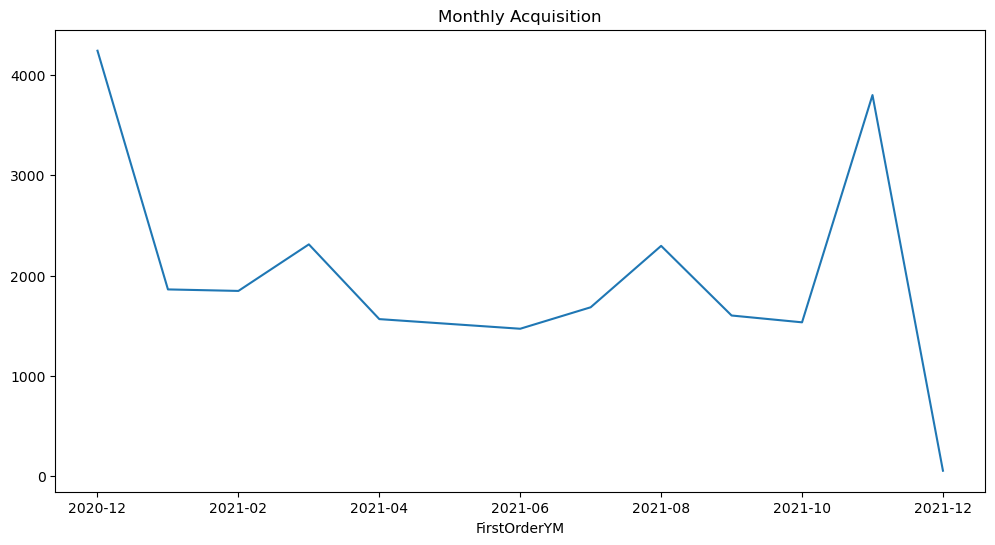

In [54]:
cohort_count[1].plot(figsize=(12,6), title="Monthly Acquisition")

### Retention Rate

In [55]:
# By dividing by the first month, we can calculate the retention rate.
# Using div, we perform the division, and setting axis=0 ensures that all subsequent months are divided by the first month.

cohort_norm = cohort_count.div(cohort_count[1], axis=0)

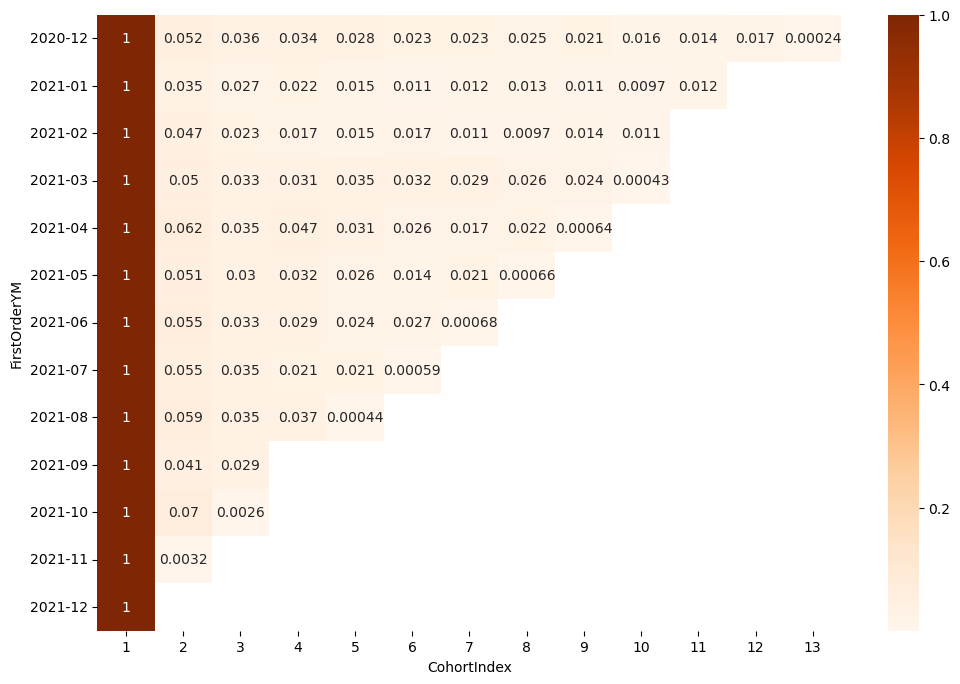

In [56]:
# heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cohort_norm, cmap="Oranges", annot=True)
plt.savefig("./Images/users_cohort_rate.png", dpi=100, bbox_inches='tight')

### Customer Sales

In [57]:
cohort_total_price = df.groupby(["FirstOrderYM", "CohortIndex"])["TotalRevenue"].sum().unstack()
cohort_total_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
FirstOrderYM,,,,,,,,,,,,,
2020-12,2265571.99,320836.96,280564.80,261533.27,231381.36,230919.82,223739.92,233842.40,272307.85,172749.80,131199.28,122782.81,354.07
2021-01,850131.99,51780.46,53906.43,42763.53,29832.61,30617.17,36866.62,47827.28,30908.60,15857.89,33815.29,NaN,NaN
2021-02,755992.70,71372.39,43153.11,47050.45,44097.83,47290.64,37994.01,32595.39,34717.41,20284.57,NaN,NaN,NaN
2021-03,1062142.56,221635.44,193912.58,166745.75,220209.97,300913.55,198295.93,136386.18,212721.97,209.82,NaN,NaN,NaN
2021-04,815192.12,102971.44,80907.96,72563.52,131801.14,98384.31,60527.45,84940.42,828.63,NaN,NaN,NaN,NaN
2021-05,747472.85,87798.38,84368.71,162029.54,54837.71,26710.42,56171.70,86.16,NaN,NaN,NaN,NaN,NaN
2021-06,676494.71,40246.46,110092.27,73395.67,58455.13,63607.75,221.38,NaN,NaN,NaN,NaN,NaN,NaN
2021-07,828172.06,153597.25,65234.54,30508.94,42917.13,292.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1558015.02,225585.06,116525.11,138142.26,427.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
cohort_total_revenue = df.groupby(["FirstOrderYM", "CohortIndex"])["TotalRevenue"].sum().unstack()
cohort_total_revenue["Total"] = cohort_total_revenue.sum(axis=1)
cohort_total_revenue["First3MonthsSum"] = cohort_total_revenue[[1, 2, 3]].sum(axis=1)
cohort_total_revenue["First3MonthsSumPer"] = cohort_total_revenue["First3MonthsSum"] / cohort_total_revenue["Total"]
cohort_total_revenue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,Total,First3MonthsSum,First3MonthsSumPer
FirstOrderYM,,,,,,,,,,,,,,,,
2020-12,2265571.99,320836.96,280564.80,261533.27,231381.36,230919.82,223739.92,233842.40,272307.85,172749.80,131199.28,122782.81,354.07,4747784.33,2866973.75,0.603855
2021-01,850131.99,51780.46,53906.43,42763.53,29832.61,30617.17,36866.62,47827.28,30908.60,15857.89,33815.29,NaN,NaN,1224307.87,955818.88,0.780701
2021-02,755992.70,71372.39,43153.11,47050.45,44097.83,47290.64,37994.01,32595.39,34717.41,20284.57,NaN,NaN,NaN,1134548.50,870518.20,0.767282
2021-03,1062142.56,221635.44,193912.58,166745.75,220209.97,300913.55,198295.93,136386.18,212721.97,209.82,NaN,NaN,NaN,2713173.75,1477690.58,0.544635
2021-04,815192.12,102971.44,80907.96,72563.52,131801.14,98384.31,60527.45,84940.42,828.63,NaN,NaN,NaN,NaN,1448116.99,999071.52,0.689911
2021-05,747472.85,87798.38,84368.71,162029.54,54837.71,26710.42,56171.70,86.16,NaN,NaN,NaN,NaN,NaN,1219475.47,919639.94,0.754127
2021-06,676494.71,40246.46,110092.27,73395.67,58455.13,63607.75,221.38,NaN,NaN,NaN,NaN,NaN,NaN,1022513.37,826833.44,0.808628
2021-07,828172.06,153597.25,65234.54,30508.94,42917.13,292.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1120722.11,1047003.85,0.934223
2021-08,1558015.02,225585.06,116525.11,138142.26,427.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2038694.85,1900125.19,0.932030


In [66]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(18, len(cohort_total_revenue) * 0.4))  # Adjust height to number of rows
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(
    cellText=cohort_total_revenue.round(2).values,
    colLabels=cohort_total_revenue.columns.astype(str),
    rowLabels=cohort_total_revenue.index.astype(str),
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale table size (width, height)

# Save the figure
plt.savefig("./Images/cohort_revenue_summary.png", dpi=150, bbox_inches='tight')
plt.close()

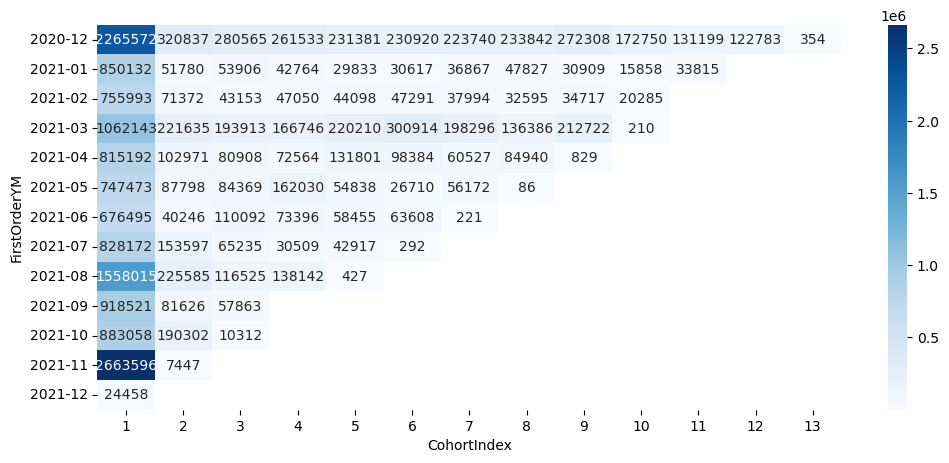

In [58]:
plt.figure(figsize=(12,5))
sns.heatmap(cohort_total_price, cmap="Blues", annot=True, fmt=".0f")
plt.savefig("./Images/revenue_by_users_cohort.png", dpi=100, bbox_inches='tight')

### MAU (Monthly Active User)


In [52]:
MAU = df.groupby("OrderYM")["user_id"].nunique()
MAU

OrderYM
2020-12    4241
2021-01    2083
2021-02    2066
2021-03    2593
2021-04    1885
2021-05    1847
2021-06    1821
2021-07    2125
2021-08    2743
2021-09    2091
2021-10    1962
2021-11    4352
2021-12      78
Name: user_id, dtype: int64

<Axes: xlabel='OrderYM'>

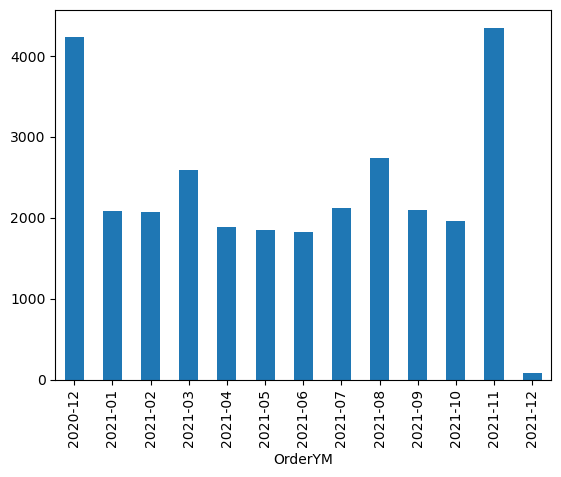

In [53]:
MAU.plot.bar()

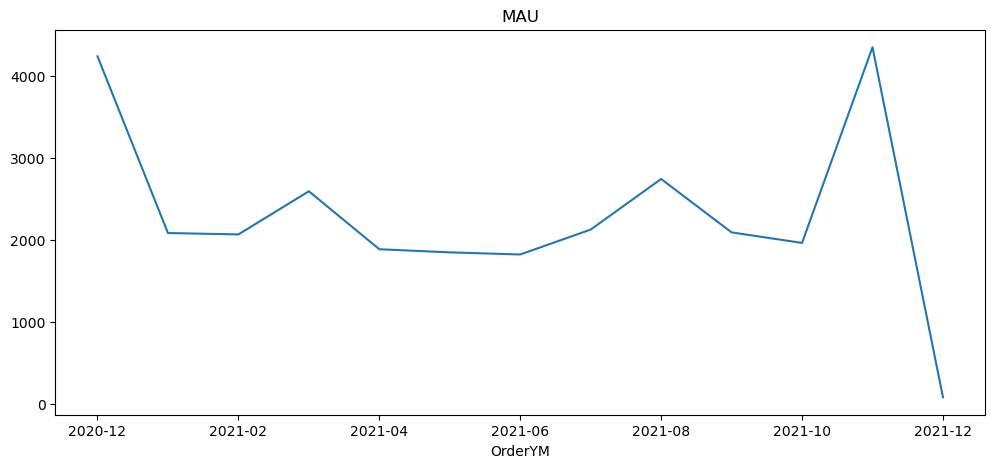

In [54]:
MAU.plot(figsize=(12,5), title= "MAU");

In [57]:
df.groupby("OrderYM").agg({"order_id":"count",
                           "category_id":"nunique",
                          "user_id":"nunique",
                          "price":"mean",
                          "quantity":"sum",
                          "TotalRevenue":"sum"})

,order_id,category_id,user_id,price,quantity,TotalRevenue
OrderYM,,,,,,
2020-12,7350,13,4241,308.241087,7350,2265571.99
2021-01,3584,11,2083,326.721247,3584,1170968.95
2021-02,3457,12,2066,314.821510,3457,1088337.96
2021-03,4549,12,2593,318.521576,4549,1448954.65
2021-04,3813,14,1885,355.133900,3813,1354125.56
2021-05,3892,12,1847,347.420285,3892,1352159.75
2021-06,3821,13,1821,342.947323,3821,1310401.72
2021-07,4297,14,2125,363.872558,4297,1563560.38
2021-08,6634,20,2743,418.236043,6634,2774577.91
